In [1]:
cd /home/roberto/Documents/Carrera/romain_ic/wavemixing_project/src

/home/roberto/Documents/Carrera/romain_ic/wavemixing_project/src


In [6]:
import os
import sys

sys.path.insert(0, os.path.abspath("./post_processing/local_calculations"))
sys.path.insert(0, os.path.abspath("./helper_functions/cloud"))
sys.path.insert(0, os.path.abspath("./file_manager"))
sys.path.insert(0, os.path.abspath("./hamiltonian_builder"))
sys.path.insert(0, os.path.abspath("./correlation"))
sys.path.insert(0, os.path.abspath("./single_and_double_excitations_subspace"))

In [9]:
from qutip import *
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from hamiltonian.hamiltonian_builder import *
from helper_functions.operators import *
from helper_functions.cloud import *
from file_manager.visualization_preparation_tools import *
from correlation.second_order_correlation  import *
from single_and_double_excitations_subspace.parameter_generator_for_ODE import *
from single_and_double_excitations_subspace.atomic_contributions_ODE import *
from post_processing.local_calculations import *
from helper_functions.cloud import *

In [10]:
def column(matrix, i, triD = False, j = 0):
    if triD != False:
        z_column = np.zeros(len(matrix))
        for z in range(len(matrix)):
            z_column[z] = matrix[z][i][j]
        return z_column  
    
    return [row[i] for row in matrix]

In [5]:
ind = 24
position_1_path = f"./benchmarking/N6_Omega0.05_Delta0.0_b0_0.1_S_Int_On_testeODE_t01_direct//positions/positions_N6_Omega0.05_Delta0.0_run{ind}.dat"
rho_1_path = f"./benchmarking/N6_Omega0.05_Delta0.0_b0_0.1_S_Int_On_testeODE_t01_direct//N6_Omega0.05_Delta0.0_run{ind}.npy"

In [22]:
b0 = 0.1
N_atoms = len(r)

Omega = 2
Delta = 20
tf = 30
t_span, dt = np.linspace(0,tf,900, retstep = True) 

In [23]:
Delta1D, Omega1D, Gamma2D, Delta2D  = GetAllODEParametersGiven_r(Omega, Delta, r, scalar = True)

In [24]:
Beta1D_time_list, Beta2D_time_list, t_span, r = SolveForBeta1DandBeta2D(N_atoms, kd = None, b0 = None, exc_radius = None, Delta = Delta, Omega = Omega, wave_mixing = True, scalar = True, interaction = True, r = r, t_span = t_span  );

### Exact solutions Vector

In [59]:
#%timeit
#V_H, V_c_ops, GTensor,M, GammaSR, DeltaSR, Omega, SR_state, r = system_spec_N(1, N_atoms, kd = None, b0 = None, exc_radius = None , Delta = Delta, Omega = Omega, wave_mixing = True, scalar = False, r = r)
#rho_ss_V, total_time_ss = get_steadystate(V_H, 0, r,  0, V_c_ops, N_atoms, faseglobal = 1, rho_ss = None, rho_ss_parameter = "direct", tmax = None)

In [25]:
%timeit
S_H, S_c_ops, GTensor,M, GammaSR, DeltaSR, Omega, SR_state, r = system_spec_N(1, N_atoms, kd = None, b0 = None, exc_radius = None , Delta = Delta, Omega = Omega, wave_mixing = True, scalar = True, r = r)
rho_ss_S, total_time_ss = get_steadystate(S_H, 0, r,  0, S_c_ops, N_atoms, faseglobal = 1, rho_ss = None, rho_ss_parameter = "direct", tmax = None)

b0 system None
kd system None
r is an array


In [26]:
S_sigmam_i_expectations = np.zeros(len(r), dtype = "object")
S_sigmam_ij_expectations = np.zeros((len(r),len(r)), dtype = "object")

V_sigmam_i_expectations = np.zeros(len(r), dtype = "object")
V_sigmam_ij_expectations = np.zeros((len(r),len(r)), dtype = "object")


for i in range(len(r)):
    S_sigmam_i_expectations[i] = expect(rho_ss_S, sigmam_i(N, i))
    #V_sigmam_i_expectations[i] = expect(rho_ss_V, sigmam_i(N, i))

    for j in range(len(r)):
        S_sigmam_ij_expectations[i][j] = expect(rho_ss_S, sigmam_i(N, i)*sigmam_i(N, j))
        #V_sigmam_ij_expectations[i][j] = expect(rho_ss_V, sigmam_i(N, i)*sigmam_i(N, j))

        

# Single Excitation $\beta_j = \langle \sigma_j \rangle $

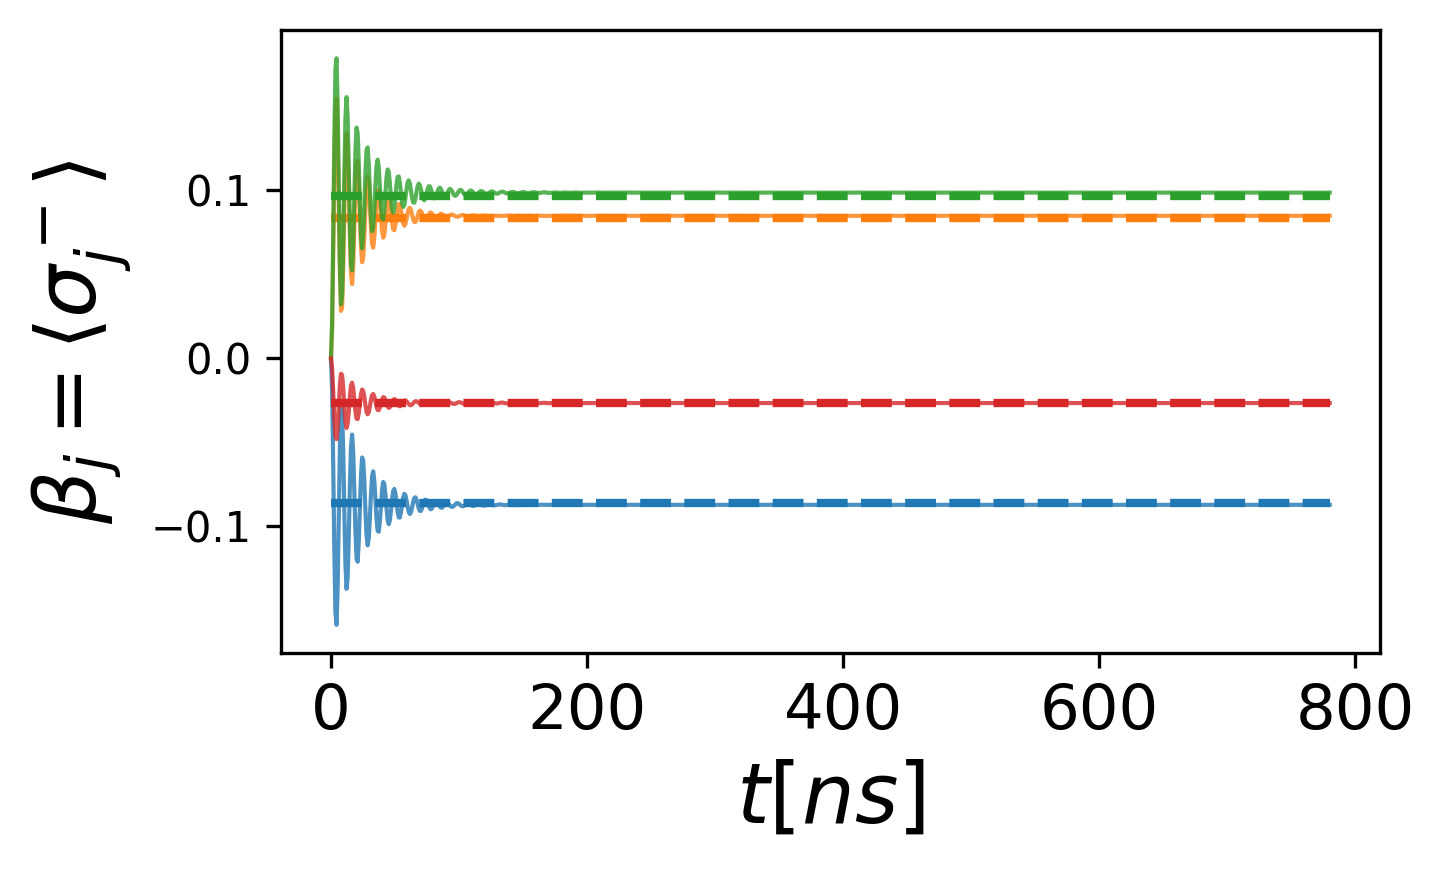

In [27]:
fig = plt.figure(figsize=(5, 3), dpi=300)
for i in range(len(r)):
    beta_plot = plt.plot(t_span*26, np.real(column(Beta1D_time_list, i)), linewidth = 1, alpha = 0.8)
    color = beta_plot[0].get_color()
    sigma_scatter = plt.plot(t_span*26, [np.real(S_sigmam_i_expectations[i]) for l in t_span],"--", c= color ,linewidth = 2  )
    plt.xlabel("$t [ns] $", fontsize = 20)
    plt.ylabel(r"$\beta_j = \langle \sigma^-_j \rangle $", fontsize = 20)
    plt.gca().tick_params(axis = 'both', which = 'major', labelsize = 15)
    plt.gca().tick_params(axis = 'y', which = 'major', labelsize = 10)
    
    
approximated_label = mlines.Line2D([], [], color='blue', marker='',
                          markersize=10, label='Scalar Approximated')
exact_label = mlines.Line2D([], [], color='blue',
                          markersize=15, linestyle = "--",label='Scalar Exact (steady-state)')

#plt.legend(handles=[approximated_label,exact_label], bbox_to_anchor=(0.43,-0.15))
fig.tight_layout()


#plt.savefig(f"./benchmarking/Beta1D_TCC_N{N}_b0_{b0}_Omega{Omega}Delta{Delta}_pos{ind}.svg", format = "svg")

# Double Excitation $\beta_{ij} = \langle \sigma_i \sigma_j \rangle $

/home/roberto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
/home/roberto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
/home/roberto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
/home/roberto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
/home/roberto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
/home/roberto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
/home/roberto/anaconda3/lib/python3.7/site-packages/

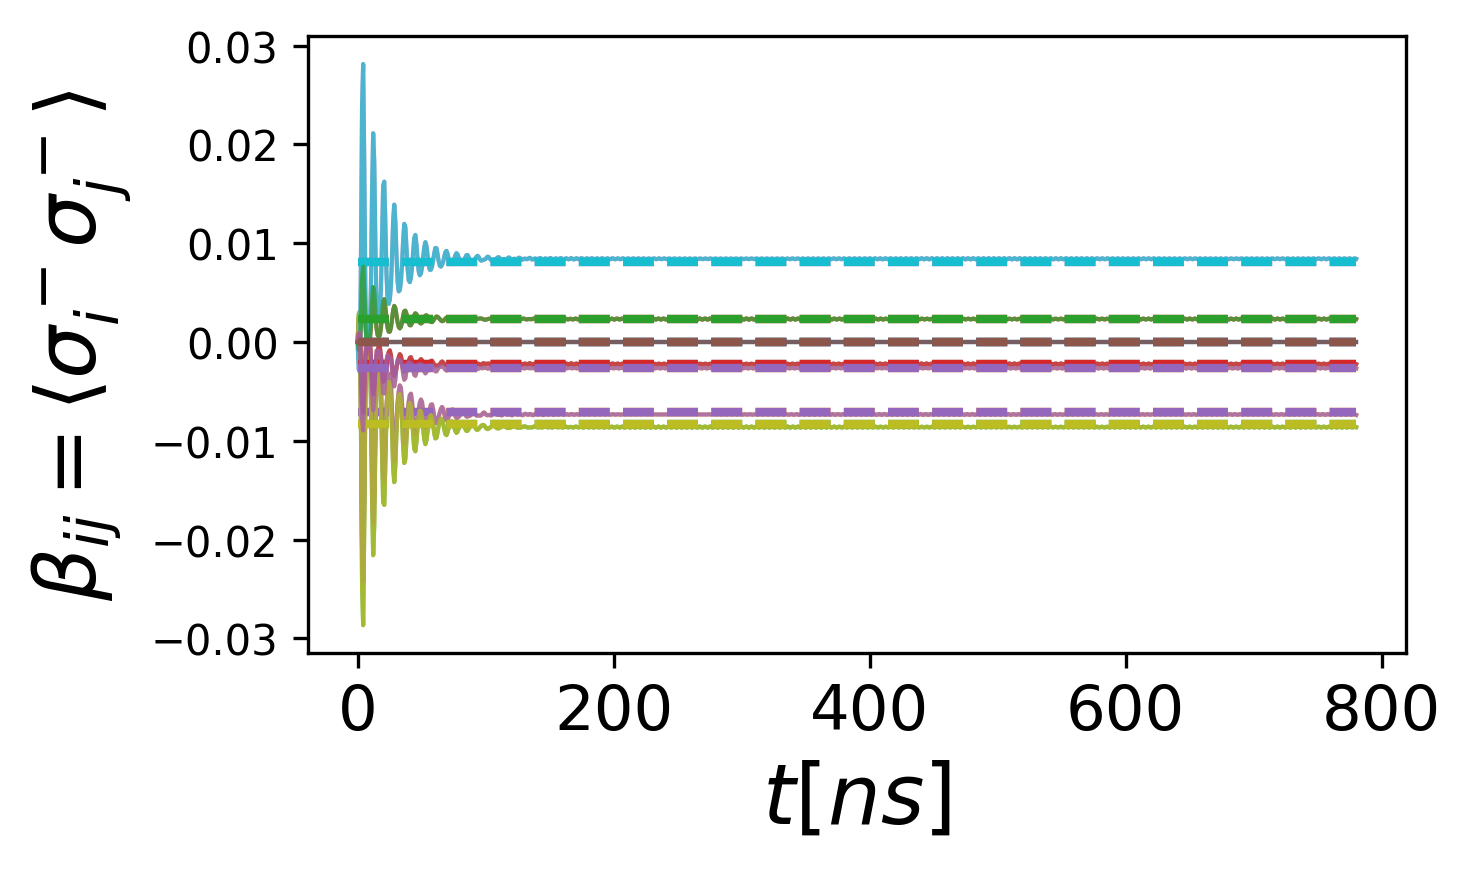

In [28]:
fig = plt.figure(figsize=(5, 3), dpi=300)
for i in range(len(r)):
    for j in range(len(r)):
        beta_plot = plt.plot(t_span*26, column(np.real(Beta2D_time_list), i, True, j),linewidth = 1,  alpha = 0.75)
        color = beta_plot[0].get_color()
        sigma_scatter = plt.plot(t_span*26, [np.real(S_sigmam_ij_expectations[i][j]) for l in t_span],"--", c= color ,linewidth = 2  )
        plt.xlabel("$t [ns] $", fontsize = 20)
        plt.ylabel(r"$\beta_{ij} = \langle \sigma^-_i\sigma^-_j \rangle $", fontsize = 20)
        plt.gca().tick_params(axis = 'both', which = 'major', labelsize = 15)
        plt.gca().tick_params(axis = 'y', which = 'major', labelsize = 10)


    
approximated_label = mlines.Line2D([], [], color='blue', marker='',
                          markersize=10, label='Scalar Approximated')
exact_label = mlines.Line2D([], [], color='blue',
                          markersize=15, linestyle = "--",label='Scalar Exact (steady-state)')

#plt.legend(handles=[approximated_label,exact_label], bbox_to_anchor=(0.43,-0.15))
fig.tight_layout()
#plt.savefig(f"./benchmarking/Beta2D_TCC_N{N}_b0_{b0}_Omega{Omega}Delta{Delta}_pos{ind}.svg", format = "svg")

# Second Correlation Function

In [122]:
taulist = np.array([0])
nhat = 1


ang1 = 25
R1 = get_nhat_from_angle(ang1)

ang2 = np.linspace(0, 360, 200)
R2_list = [] 
g2_zero_exact = []
g2_zero_approximated = []
V_g2_zero_exact = []


for theta in ang2:
        #sys.stdout.write("\r{0}".format(theta))
        #sys.stdout.flush()
        
        R2 = get_nhat_from_angle(theta)
        R2_list.append(get_nhat_from_angle(theta))
        
        g2_i = g2_l(S_H, nhat, r, R1, R2, taulist, S_c_ops, N_atoms, faseglobal = 1, rho_ss = None, rho_ss_parameter = "direct", tmax = None)[0]
        g2_zero_exact.append(g2_i)
        
        #g2_i = g2_l(V_H, nhat, r, R1, R2, taulist, V_c_ops, N_atoms, faseglobal = 1, rho_ss = None, rho_ss_parameter = "direct", tmax = None)[0]        
        #V_g2_zero_exact.append(g2_i)
        
        g2_i = np.real(g2_of_zero_subspace_approach(r, R1, R2, Beta1D_time_list[-1], Beta2D_time_list[-1]))
        g2_zero_approximated.append(g2_i)
        


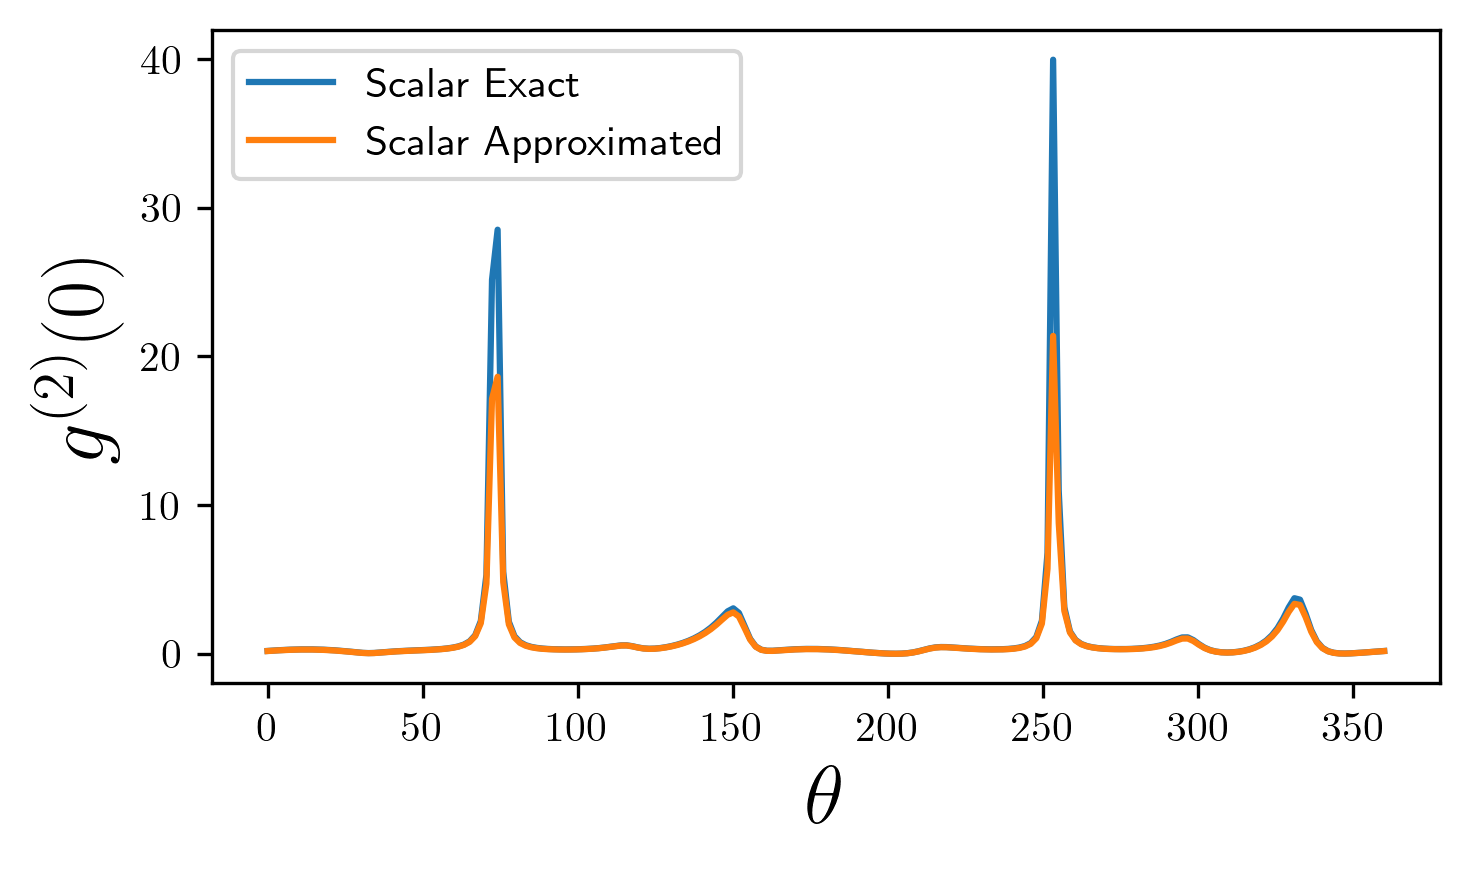

In [123]:
fig = plt.figure(figsize=(5, 3), dpi=300)

ang2 = np.linspace(0, 360, 200)

plt.plot(ang2, g2_zero_exact,label = "Scalar Exact")
plt.plot(ang2, np.array(g2_zero_approximated)*1/4*4, label = "Scalar Approximated")
#plt.plot(ang2, V_g2_zero_exact, "--", label = "Vector Exact")


plt.xlabel(r"$\theta$", size = 20)
plt.ylabel(r"$g^{(2)}(0)$", size = 20)
#plt.scatter([25],[2], marker =  "*", label = "Recife (Same direction)")
#plt.scatter([220],[1], marker =  "*", label = "Recife (Opposite direction)")
plt.legend()
fig.tight_layout()
plt.savefig(f"./benchmarking/g2zero_TCC_N{N}_b0_{b0}_Omega{Omega}Delta{Delta}_pos{ind}.svg", format = "svg")


radius from center 1.7613435533709483
radius from center 0.9138419551269251
radius from center 1.5073988607573194
radius from center 1.922542989311346
radius from center 1.9702051464363854
radius from center 0.604382040174211
draw 2.0


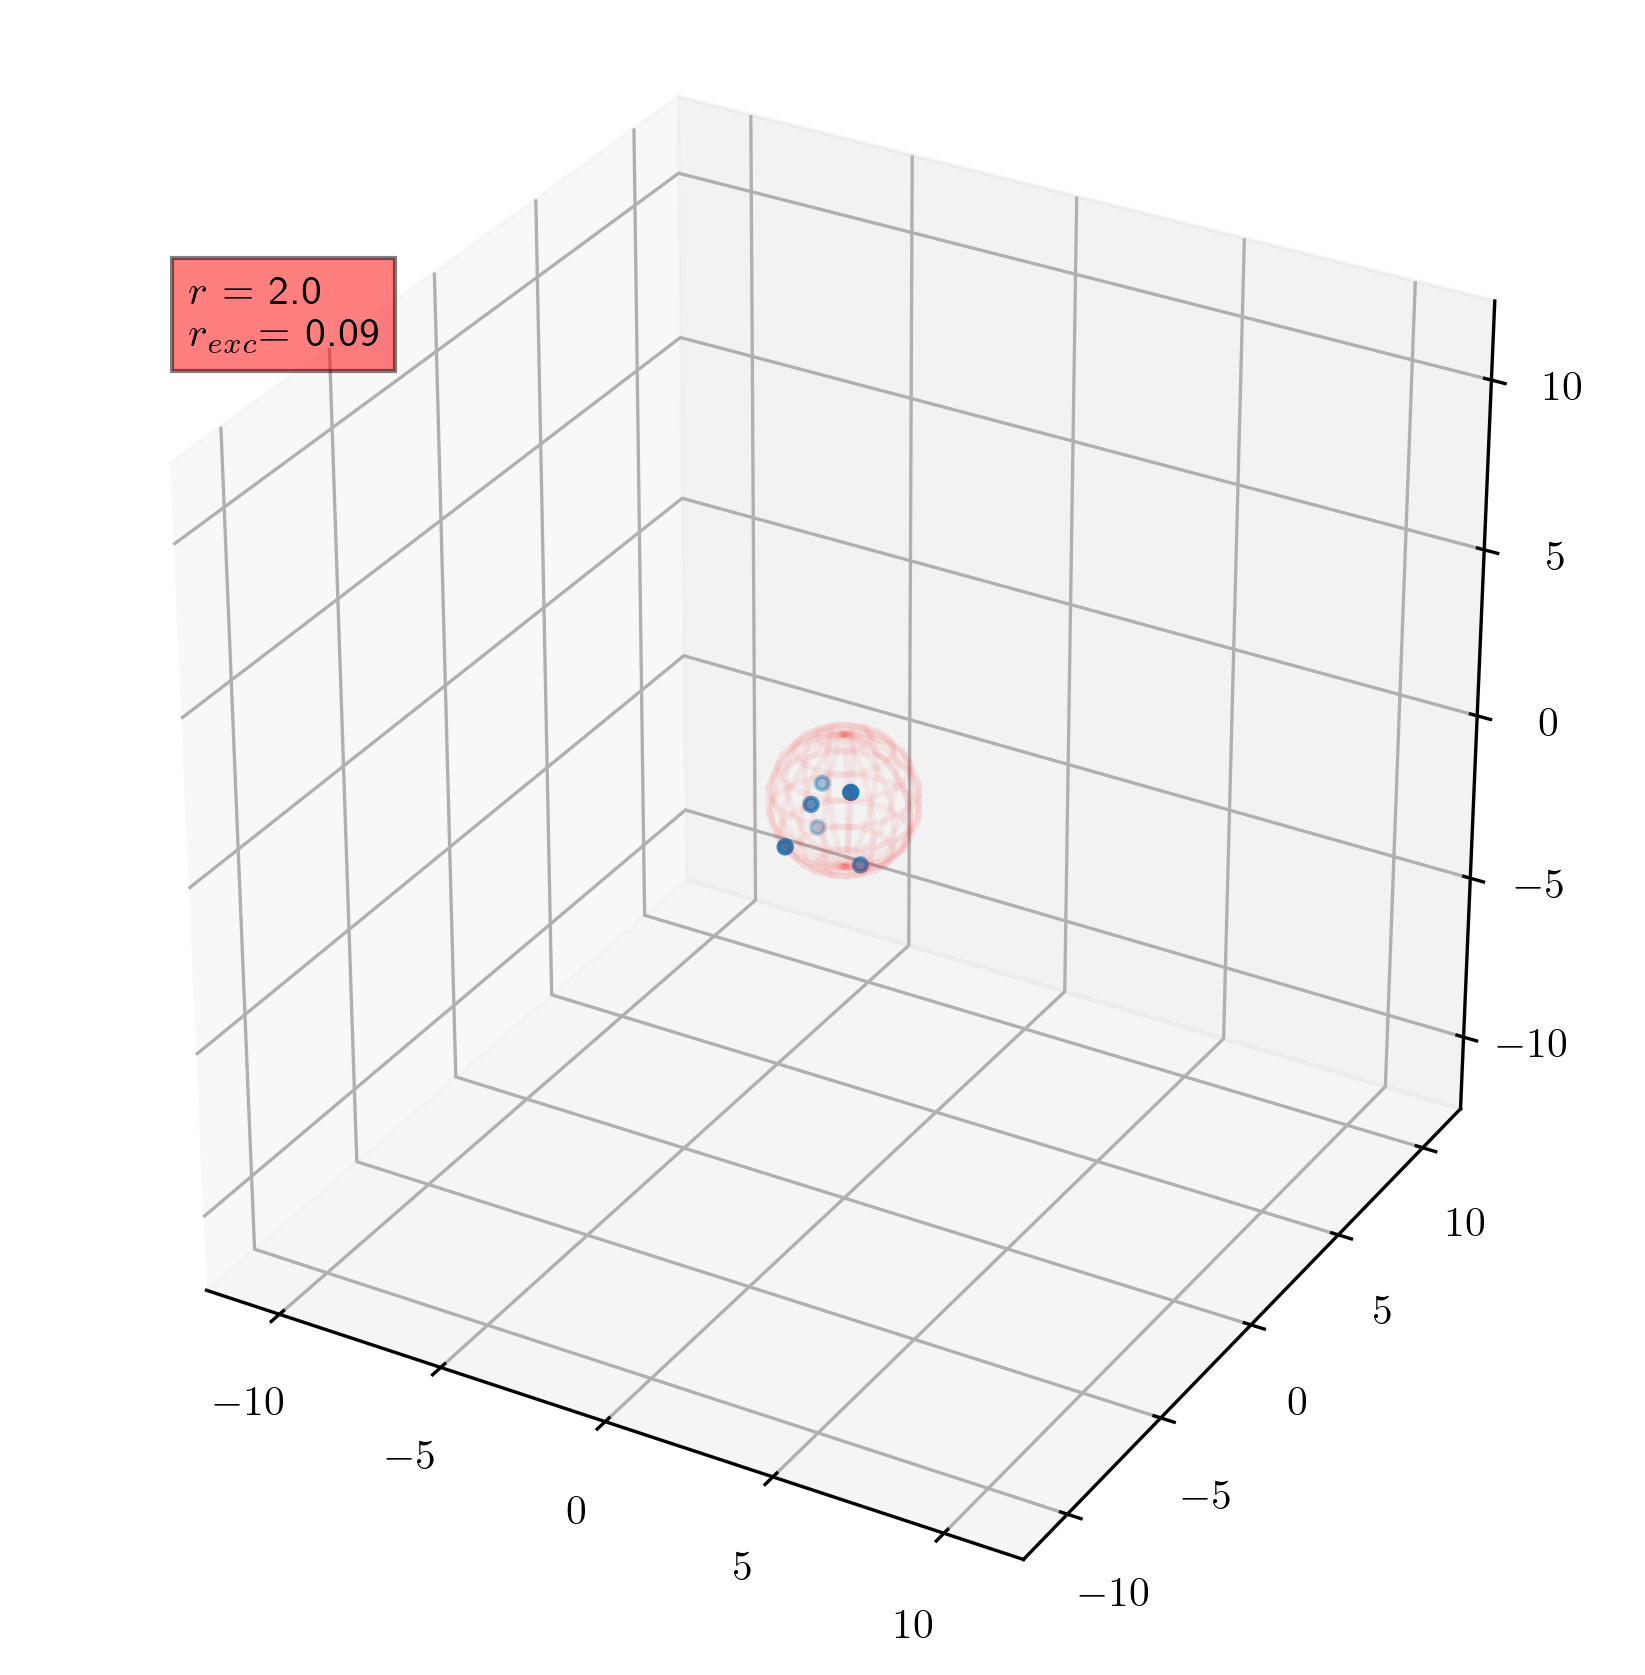

In [88]:
b0 = 3
N=6
ind = 10
ra = random_cloud(0, N, exc_radius = None, b0 = b0 )
ax = draw_cloud(ra, b0, alpha =  0.05)
ax.figure.savefig(f"./benchmarking/cloud_b0_{b0}_pos{ind}.svg", format="svg")

In [89]:
ind = 11

In [90]:
r = ra
b0 = 3
N_atoms = len(r)
tf = 30
Omega = 2
Delta = 20
t_span, dt = np.linspace(0,tf,500, retstep = True) 

In [91]:
Delta1D, Omega1D, Gamma2D, Delta2D  = GetAllODEParametersGiven_r(Omega, Delta, r, scalar = True)

In [92]:
Beta1D_time_list, Beta2D_time_list, t_span, r = SolveForBeta1DandBeta2D(N_atoms, kd = None, b0 = None, exc_radius = None, Delta = Delta, Omega = Omega, wave_mixing = True, scalar = True, interaction = True, r = r, t_span = t_span  );

In [93]:
%timeit
#V_H, V_c_ops, GTensor,M, GammaSR, DeltaSR, Omega, SR_state, r = system_spec_N(1, N_atoms, kd = None, b0 = None, exc_radius = None , Delta = Delta, Omega = Omega, wave_mixing = True, scalar = False, r = r)
#rho_ss_V, total_time_ss = get_steadystate(V_H, 0, r,  0, V_c_ops, N_atoms, faseglobal = 1, rho_ss = None, rho_ss_parameter = "direct", tmax = None)
%timeit
S_H, S_c_ops, GTensor,M, GammaSR, DeltaSR, Omega, SR_state, r = system_spec_N(1, N_atoms, kd = None, b0 = None, exc_radius = None , Delta = Delta, Omega = Omega, wave_mixing = True, scalar = True, r = r)
rho_ss_S, total_time_ss = get_steadystate(S_H, 0, r,  0, S_c_ops, N_atoms, faseglobal = 1, rho_ss = None, rho_ss_parameter = "direct", tmax = None)

b0 system None
kd system None
r is an array


In [94]:
S_sigmam_i_expectations = np.zeros(len(r), dtype = "object")
S_sigmam_ij_expectations = np.zeros((len(r),len(r)), dtype = "object")

#V_sigmam_i_expectations = np.zeros(len(r), dtype = "object")
#V_sigmam_ij_expectations = np.zeros((len(r),len(r)), dtype = "object")


for i in range(len(r)):
    S_sigmam_i_expectations[i] = expect(rho_ss_S, sigmam_i(N_atoms, i))
    #V_sigmam_i_expectations[i] = expect(rho_ss_V, sigmam_i(N_atoms, i))

    for j in range(len(r)):
        S_sigmam_ij_expectations[i][j] = expect(rho_ss_S, sigmam_i(N_atoms, i)*sigmam_i(N_atoms, j))
        #V_sigmam_ij_expectations[i][j] = expect(rho_ss_V, sigmam_i(N_atoms, i)*sigmam_i(N_atoms, j))

        

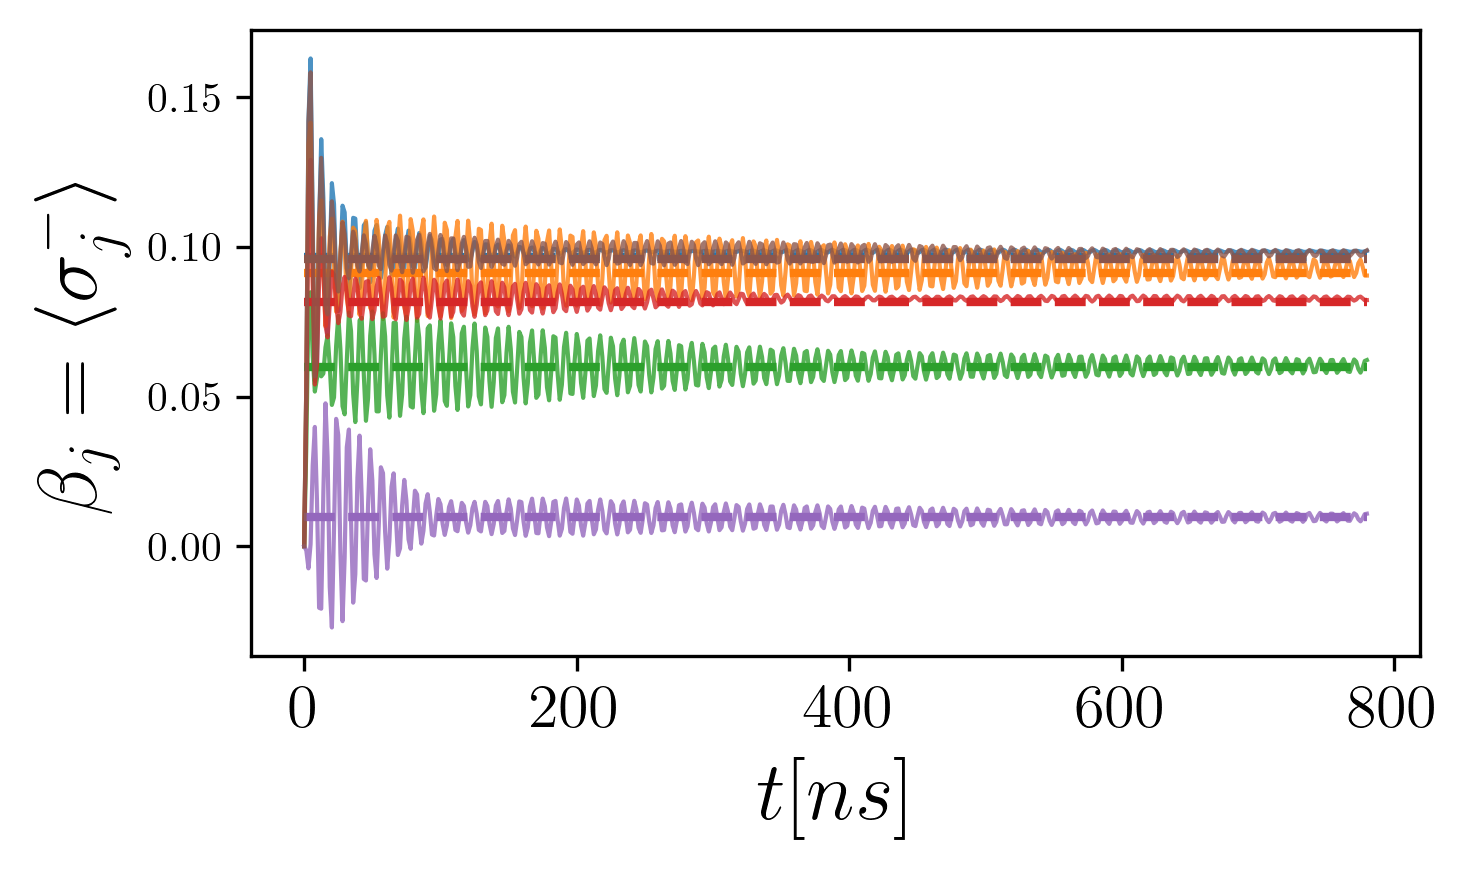

In [95]:
fig = plt.figure(figsize=(5, 3), dpi=300)
for i in range(len(r)):
    beta_plot = plt.plot(t_span*26, np.real(column(Beta1D_time_list, i)), linewidth = 1,  alpha = 0.80)
    color = beta_plot[0].get_color()
    sigma_scatter = plt.plot(t_span*26, [np.real(S_sigmam_i_expectations[i]) for l in t_span],"--", c= color ,linewidth = 2  )
    plt.xlabel("$t [ns] $", fontsize = 20)
    plt.ylabel(r"$\beta_j = \langle \sigma^-_j \rangle $", fontsize = 20)
    plt.gca().tick_params(axis = 'both', which = 'major', labelsize = 15)
    plt.gca().tick_params(axis = 'y', which = 'major', labelsize = 10)
    
    
approximated_label = mlines.Line2D([], [], color='blue', marker='',
                          markersize=10, label='Scalar Approximated')
exact_label = mlines.Line2D([], [], color='blue',
                          markersize=15, linestyle = "--",label='Scalar Exact (steady-state)')
#plt.legend(handles=[approximated_label,exact_label], bbox_to_anchor=(0.43,-0.15))
fig.tight_layout()

plt.savefig(f"./benchmarking/Beta1D_TCC_N{N}_b0_{b0}_Omega{Omega}Delta{Delta}_pos{ind}.svg", format = "svg")

/home/roberto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
/home/roberto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
/home/roberto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
/home/roberto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
/home/roberto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
/home/roberto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
/home/roberto/anaconda3/lib/python3.7/site-packages/

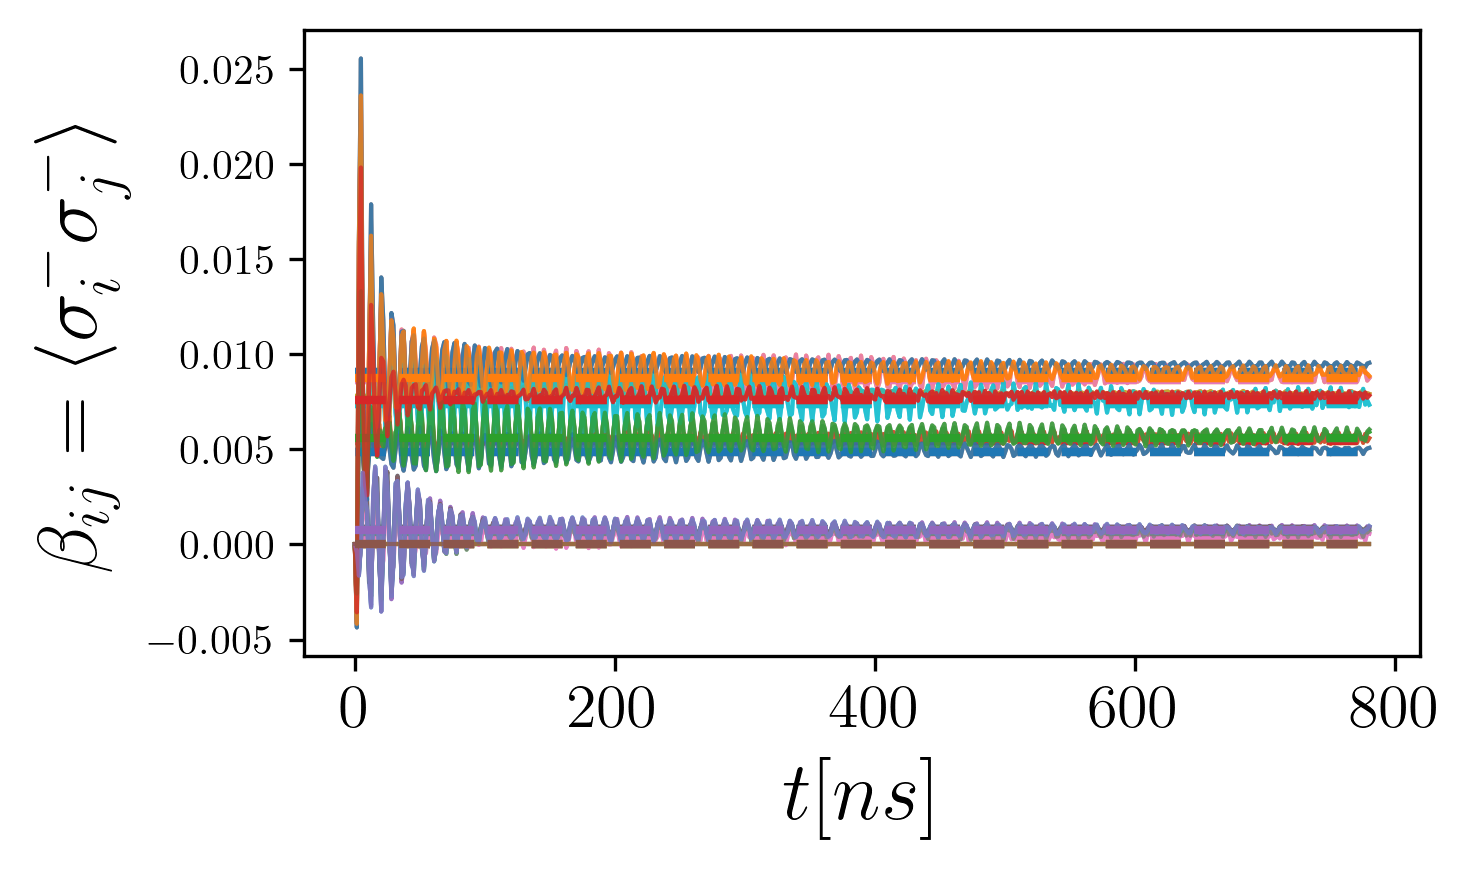

In [96]:
fig = plt.figure(figsize=(5, 3), dpi=300)
for i in range(len(r)):
    for j in range(len(r)):
        beta_plot = plt.plot(t_span*26, column(np.real(Beta2D_time_list), i, True, j),linewidth = 1,  alpha = 0.75)
        color = beta_plot[0].get_color()
        sigma_scatter = plt.plot(t_span*26, [np.real(S_sigmam_ij_expectations[i][j]) for l in t_span],"--", c= color ,linewidth = 2  )
        plt.xlabel("$t [ns] $", fontsize = 20)
        plt.ylabel(r"$\beta_{ij} = \langle \sigma^-_i\sigma^-_j \rangle $", fontsize = 20)
        plt.gca().tick_params(axis = 'both', which = 'major', labelsize = 15)
        plt.gca().tick_params(axis = 'y', which = 'major', labelsize = 10)


    
approximated_label = mlines.Line2D([], [], color='blue', marker='',
                          markersize=10, label='Scalar Approximated')
exact_label = mlines.Line2D([], [], color='blue',
                          markersize=15, linestyle = "--",label='Scalar Exact (steady-state)')

#plt.legend(handles=[approximated_label,exact_label], bbox_to_anchor=(0.43,-0.15))
fig.tight_layout()
plt.savefig(f"./benchmarking/Beta2D_TCC_N{N}_b0_{b0}_Omega{Omega}Delta{Delta}_pos{ind}.svg", format = "svg")

In [97]:
taulist = np.array([0])
nhat = 1


ang1 = 25
R1 = get_nhat_from_angle(ang1)

ang2 = np.linspace(0, 360, 200)
R2_list = [] 
g2_zero_exact = []
g2_zero_approximated = []
V_g2_zero_exact = []


for theta in ang2:
        #sys.stdout.write("\r{0}".format(theta))
        #sys.stdout.flush()
        
        R2 = get_nhat_from_angle(theta)
        R2_list.append(get_nhat_from_angle(theta))
        
        g2_i = g2_l(S_H, nhat, r, R1, R2, taulist, S_c_ops, N_atoms, faseglobal = 1, rho_ss = None, rho_ss_parameter = "direct", tmax = None)[0]
        g2_zero_exact.append(g2_i)
        
        #g2_i = g2_l(V_H, nhat, r, R1, R2, taulist, V_c_ops, N_atoms, faseglobal = 1, rho_ss = None, rho_ss_parameter = "direct", tmax = None)[0]        
        #V_g2_zero_exact.append(g2_i)
        
        g2_i = np.real(g2_of_zero_subspace_approach(r, R1, R2, Beta1D_time_list[-1], Beta2D_time_list[-1]))
        g2_zero_approximated.append(g2_i)
        


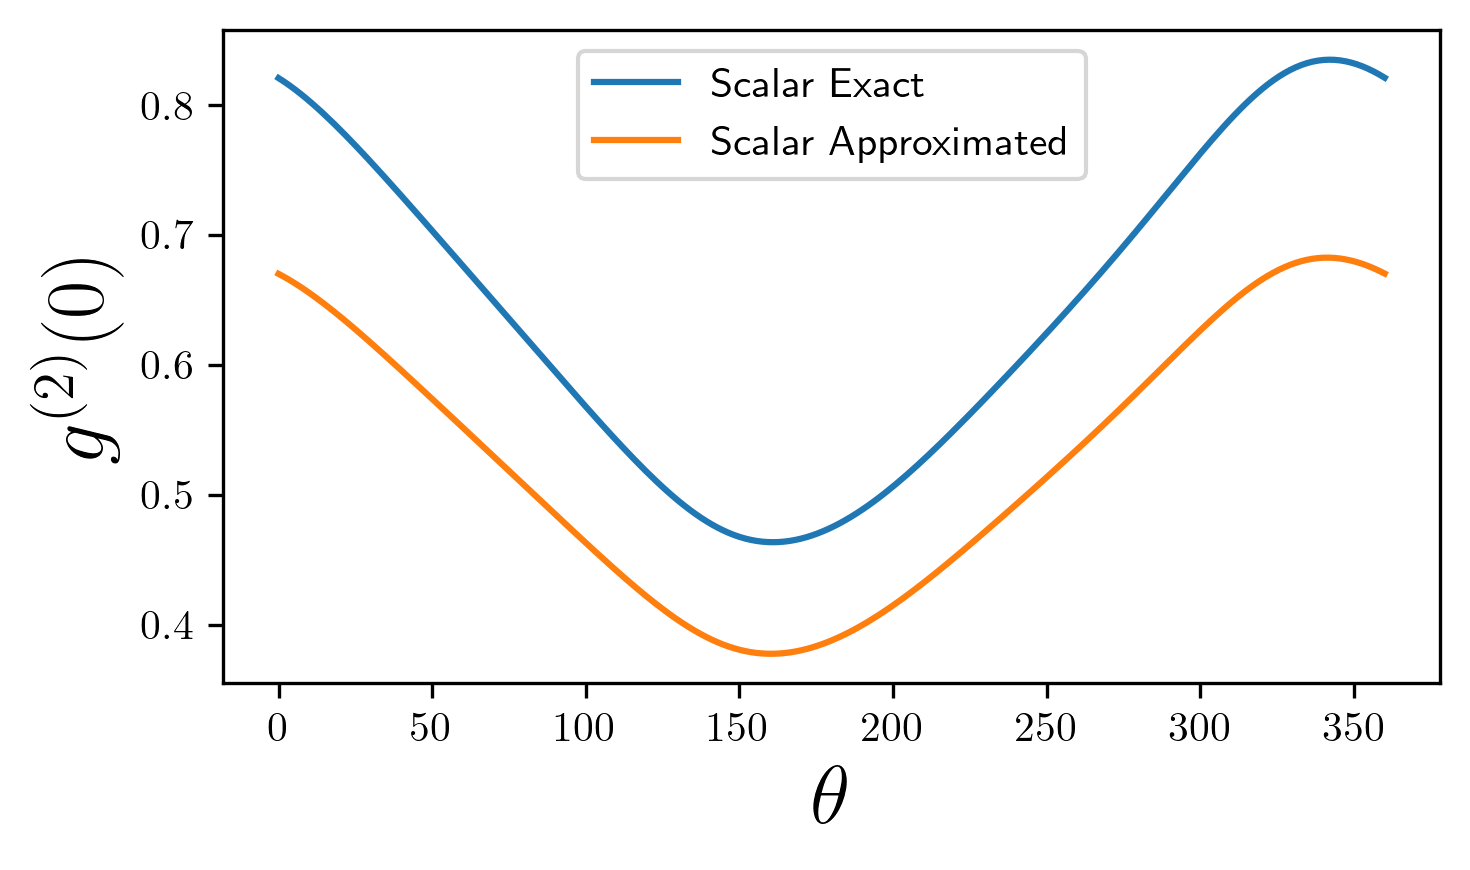

In [98]:
fig = plt.figure(figsize=(5, 3), dpi=300)

ang2 = np.linspace(0, 360, 200)

plt.plot(ang2, g2_zero_exact,label = "Scalar Exact")
plt.plot(ang2, np.array(g2_zero_approximated)*1/4*4, label = "Scalar Approximated")
#plt.plot(ang2, V_g2_zero_exact, "--", label = "Vector Exact")


plt.xlabel(r"$\theta$", size = 20)
plt.ylabel(r"$g^{(2)}(0)$", size = 20)
#plt.scatter([25],[2], marker =  "*", label = "Recife (Same direction)")
#plt.scatter([220],[1], marker =  "*", label = "Recife (Opposite direction)")
plt.legend()
fig.tight_layout()
plt.savefig(f"./benchmarking/g2zero_TCC_N{N}_b0_{b0}_Omega{Omega}Delta{Delta}_pos{ind}.svg", format = "svg")